# Imports 

In [2]:
# imports
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

## Carregamento dos dados e divisão entre treino e teste

In [3]:
# Carregando os dados para um df
df = pd.read_csv('/datasets/users_behavior_upd.csv')
df

,calls,minutes,messages,mb_used,is_ultimate
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
# Divisão de features e target
X = df.drop(['is_ultimate'], axis=1)
y = df['is_ultimate']

In [4]:
# Divisão dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

Como eu ja fiz o tratamento e analise do dados eu parti direto para divisão do df nas features e target. Por não se tratar de um extenso DF eu optei por dividi-lo em 80% para treino e 20% para teste. 

## Módelos

### RandomForestClassifier

In [5]:
# Módelo com os melhores valores para os hiperparametros

rf_model = RandomForestClassifier(max_depth= None, min_samples_leaf=2, min_samples_split= 10, n_estimators= 300, random_state=6)

In [6]:
# Treinamento do módelo com os melhores valores dos hiperparametros

rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=6)

In [7]:
# Prevendo o os targets dos dados de teste com o módelo com os melhores valores dos hiperparametros

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       433
           1       0.73      0.58      0.65       210

    accuracy                           0.79       643
   macro avg       0.77      0.74      0.75       643
weighted avg       0.79      0.79      0.78       643



In [8]:
# Escolhendo os hiperparametros para o grid_search 

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [9]:
# Definindo o grid_search para realizar a busca dos melhores hiperparametros

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=6),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  
                          verbose=2)

In [10]:
# Busca em si dos hiperparametros (em torno de 10 a 15 min)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [11]:
# Selecionando os melhores valores para os hiperparametros escolhidos e o seu melhor score

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score:.2f}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.82


In [12]:
# Criando o modelo com base no resultado do grid_search e treinando o módelo

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy:.2f}')

Accuracy with Best Parameters: 0.79


In [13]:
# Prevendo os targets dos dados de teste com o módelo

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       433
           1       0.73      0.58      0.65       210

    accuracy                           0.79       643
   macro avg       0.77      0.74      0.75       643
weighted avg       0.79      0.79      0.78       643



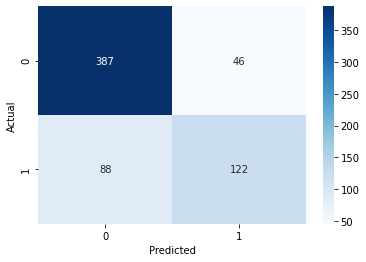

In [14]:
# Matriz de confusão para melhor entendimento dos acertos e erros do módelo escolhido como principal

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Essa matriz de confusão reflete o desempenho do modelo de classificação. No caso apresentado, o modelo previu corretamente 387 casos como positivos (Verdadeiros Positivos) e corretamente 122 casos como negativos (Verdadeiros Negativos). No entanto, o modelo cometeu erros ao prever 46 casos como negativos quando eram positivos (Falsos Negativos) e 88 casos como positivos quando eram negativos (Falsos Positivos). Esses números ajudam a entender como o modelo está se saindo e onde estão ocorrendo os erros.

Depois do uso do GridSearchCV, observamos que os valores com maior acuracia nos hiperparametros são:

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


'max_depth': None controla a profundidade máxima das árvores, permitindo que elas cresçam até que os nós contenham um número mínimo de amostras.
'min_samples_leaf': 2 define o número mínimo de amostras necessárias para serem folhas em uma árvore.
'min_samples_split': 10 determina o número mínimo de amostras necessárias para realizar uma divisão em um nó interno.
'n_estimators': 300 especifica o número de árvores na floresta aleatória, influenciando a diversidade e robustez do modelo.

Escolhi esses 4 hiperparametros por serem os 4 que eu mais vi e usei em meus projetos.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Importante incluir aqui quais as conclusões que chegou em termos de parâmteros após o grid search.
</div>

### Decision Tree

In [15]:
# Definindo e treinando o módelo

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Prevendo os targets dos dados de teste e medindo a acuracia
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       433
           1       0.57      0.57      0.57       210

    accuracy                           0.72       643
   macro avg       0.68      0.68      0.68       643
weighted avg       0.72      0.72      0.72       643



In [16]:
# Definindo os hiperparametros para o GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [18]:
# Definindo o GridSearchCV com o módelo 
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=6),
                              param_grid=param_grid,
                              scoring='accuracy',
                              cv=5,  
                              verbose=2)

In [19]:
# Buscando os melhores parametros do modelo
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [20]:
# Vizualizando os melhores hiperparametros
best_params = dt_grid_search.best_params_
best_score = dt_grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score:.2f}')


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.79


In [21]:
# Treinando o modelo baseado nos melhores hiperparametros e medindo sua acuracia
best_dt_model = dt_grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

y_pred = best_dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy:.2f}')


Accuracy with Best Parameters: 0.76


Observamos neste modelo uma alta velocidade, porém, um leve decaimento na acurácia se comparado ao modelo anterior. Os valores para os hiperparâmetros que resultaram em uma maior acurácia, segundo a busca em grade (GridSearch), foram:

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

Os quatro hiperparâmetros escolhidos são relativamente comuns em árvores de decisão (Decision Trees) e florestas aleatórias (Random Forests). Ao contrário do modelo anterior, optei por usar o hiperparâmetro 'criterion', que especifica o critério utilizado pelos algoritmos para determinar como realizar as divisões nos nós.

### XGBoost

**Nota: Os blocos que estão em Markdown é o módelo com o uso do GridSearchCV. Coloquei ele nesse formato para não ser lido por conta do tempo de treinamento (50 a 60 min).**

**Os resultados de sua acuracia com o uso do grid_search não é significativo, tendo em torno de 1% a 2% de acuracia a mais que o RandomForestClassifier com o uso do grid_search.**

In [22]:
# Definindo e treinando o módelo
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


[13:55:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
# Prevendo e medindo sua acuracia
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       433
           1       0.70      0.57      0.63       210

    accuracy                           0.78       643
   macro avg       0.76      0.73      0.74       643
weighted avg       0.77      0.78      0.77       643



param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0.1, 1.0, 10.0]
}


xgb_grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                               param_grid=param_grid,
                               scoring='accuracy',
                               cv=5,  
                               verbose=2)


xgb_grid_search.fit(X_train, y_train)


best_params = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score:.2f}')


best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy:.2f}')

# Conclusão

Entre os 3 módelos testados, o RandomForestClassifier com o uso do GridSearchCV se destaca com a acuracia de 79% e com o tempo de processamento em torno de 10 minutos.

O DecisionTreeClassifier teve uma acuracia de 76% com o uso do GridSearchCV, sendo o mais rápido dos 3.

O XGBoost sem o uso do GridSearchCV teve uma acuracia de 78% e o tempo de processamento de 1 min. Com o uso do GridSearchCV e a quantidade de hiperparametros que eu escolhi o seu tempo de processamento foi de 50 a 60 min, e uma acuracia de 80%, o que para mim não justifica o tempo de processamento.


Tendo isso em mente, o melhor módelo em minha visão nesse caso seria o RandomForestClassifier com o GridSearchCV por ter um tempo de treinamento médiano e uma boa acuracia.